<a href="https://colab.research.google.com/github/msremigio/projects_DataScience/blob/master/Titanic_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic: Machine Learning from Disaster**
>> Data Science challenge from Kaggle

---
Due to its known popularity and simple approach, the Titanic challenge created by [Kaggle](https://www.kaggle.com/) became an excellent introdutory practical activity to people interested to emerge in the Data Science (DS) universe.

The way this challenge was developed helps a beginner in this field to have an overall understanding of what DS is about. It was not different for me back then, as a Data Science novice I used this challenge to exercise everything I had learned up to that point, and it was very helpful to start developing skills exploring real Data Bases (DB) and the "must know" tools used to manipulate data, visualize data information and "teach" the machine with an appropriate machine learning (ML) model.

Almost everyone is familiarized with the Titanic history, the most modern ship of that time, consired by many as an "unsinkable" ship, sank on April 15, 1912, during her maiden voyage **resulting in the death of 1502 out of 2224  passengers and crew.**

![](https://github.com/carlosfab/data_science/raw/12a0756780e50508d6142f8b32576e2812369415/img/titanic.jpeg)

This massive number of deaths were caused primarily because there weren't enought lifeboats for everyone on board. However, despite the element of luck involved in surviving, some groups of people seemed to have a greater chance to survive than others, indicating that the **real data** at hand can show us some hidden information on which groups of people are those that had a "greater luck" of surviving.

> **To summarize, the challenge goal is to build a predictive model, using the available data, that answers the question: “what sorts of people were more likely to survive?”**



# Development Sequence

1.   Understanding the Problem
2.   Importing the Data
3.   Data Exploration
4.   Pre-processing the Data
5.   Machine Learning Model Creation
6.   Results and Performance Analysis  



# 1. Understanding the Problem

Costing US$ 7.5 million at the time, Titanic took about 2 years to be completely build (1909 - 1911) being the largest ship afloat at the time she entered service capable of carrying up to 2435 passengers with 892 people crew.

Her maiden voyage took place on April 10,1912, leaving from Southampton (UK) to New York (US). Four days after leaving Southampton the Titanic collapsed with an iceberg and sank, causing the death of 1502 from 2224 people aboard.

The complete description of the challenge together with the instructions and passengers data are available on Kaggle website ([Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview)).

The root causes of this tragedy were both provoked by natural nonconformities (climate reasons) and human mistake due to negligence and overconfidence (since there was sufficient lifeboats for 1178 people).

Although it is known that luck had a great impact on the surviving chances it is also known that women, children and first class passengers had a greater chance of surviving, giving some hint on what information and patterns could be extracted from the raw data.

# Challenge Goals

**Analyse the dataset** that was given and identify **which variables has the greater correlation with the chances of surviving** (which sets of people were "luckier").

Whith the data at hand, it is desired that you're able to build a machine learning model capable of predicting if a passenger given as input would be a survivor in this incident.

# Measuring the Model Performance

The performance or **score** will be calculated based only upon the number of correct predictions made by your model. In other words, only the model **accuracy** is measured.


# 2. Importing the Data

The data available on Kaggle [website](https://www.kaggle.com/c/titanic/data) were previously divided in two groups:

*   Train Dataset
  * The training set should be used to build the desired machine learning models. For this dataset it's provided if each passenger survived or not. 
  * Based on **features** like passengers gender, class, age and many others.
*   Test Dataset
  * The test set should be used to see how well your model performs on unseen data. Information on wheather or not the passenger died is not provided in this dataset.
  * For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

It is also included a file named **gender_submission.csv**, as an example of what a submission file should look like before uploading it to Kaggle's platform.

If you desire to replicate this project and be part of this competition, you need to create an account on Kaggle first. In that way you're going to have access to the same dataset I'm using during this project.

First of all, let's start importing all the necessary python libraries and creating the **train** and **test** DataFrames (DF) by reading the train and test datasets.




In [0]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow to visualize all columns
pd.options.display.max_columns = None

# Render graphics directly on notebook
#%matplotlib inline


In [0]:
train_df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/data_science/master/data/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/data_science/master/data/test.csv')

* **How many variables (columns) and how many entries (rows) there are in my train and test DataFrames?**




In [5]:
# Verifying the shape of the train DataFrame
print('{:-^40}\nVariables:\t{}\nEntries:\t{}'.format(' Train DataFrame: ', train_df.shape[1], train_df.shape[0]))

# Verifying the shape of the test DataFrame
print('{:-^40}\nVariables:\t{}\nEntries:\t{}'.format(' Test DataFrame ', test_df.shape[1], test_df.shape[0]))

----------- Train DataFrame: -----------
Variables:	12
Entries:	891
------------ Test DataFrame ------------
Variables:	11
Entries:	418


# 3. Data Exploration

In an initial analysis it's really important to verify each variable separetely, paying attention to its name,type, searching for missing values, ouliers and its statistical characteristics.

I strongly suggest that you start by looking the name and type of each variable in the dataset, learning what each variable represents, as follows ([See each variable explained on Kaggle website](https://www.kaggle.com/c/titanic/data)):

# Data Dictionary

* **PassengerID:** Identification number for each passenger 
* **Survived:** Indicates wheather or not a passenger survived to the disaster
  * 0 = Not survived
  * 1 = Survived
* **Pclass:** The ticket class. An indicative of the socio-economic status of the passenger
  * 1 = 1st Class (Upper floors in the ship)
  * 2 = 2nd Class (Middle floors in the ship)
  * 3 = 3rd Class (Lower floors in the ship)
* **Name:** Name of the passenger
* **Sex:** Sex of the passenger
* **Age:** Age of the passenger in years
  * Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* **SibSp:** Number of siblings / spouses aboard
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)
* **Parch:** Number of parents / children aboard
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.
* **Ticket:** Ticket number
* **Fare:** Passenger fare value
* **Cabin:** Cabin number
* **Embarked:** Port of embarkation
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton

Given each variable meaning, we can observe some of their values in the DataFrame to identify each variable type afterwards:




In [6]:
# Displaying the first 5 entries of the train DF
display(train_df.head(5))
#display(train_df.tail(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **What are the types of each variable?**

  * Numerical
    * Discrete
      * PassengerID (primary key)
      * Survived (target variable)
      * Pclass
      * SibSp
      * Parch
    * Continuous
      * Age
      * Fare
  * Categorical
    * Nominal
      * Name
      * Sex
      * Ticket
      * Cabin
      * Embarked

To verify we are correct in our data types classification we can use the following **pandas library** method:

In [7]:
# Name and type of each variable in the train DataFrame
print(f'{" Variables in the DataFrame ":-^40}')
display(train_df.dtypes)

------ Variables in the DataFrame ------


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Following with the data exploration, it is possible to see a summary of the main statistical features of the train DataFrame.

**Passing the argument include = ['O'] to the describe method is a way of obtaining some statistical information about the non-numerical variables**

In [8]:
# Statistical summary of the numerical variables
print(f'{" Numerical Variables Statistics ":-^100}\n')
display(train_df.describe())

# Statistical summary of the categorical variables
print(f'\n{" Categorical Variables Statistics ":-^100}\n')
display(train_df.describe(include = ['O']))

---------------------------------- Numerical Variables Statistics ----------------------------------



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



--------------------------------- Categorical Variables Statistics ---------------------------------



,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Heikkinen, Miss. Laina",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


Just by observing these previous outputs,it is possible to take some insights on the number of missing values for each variable and even look for outliers if they are present in the dataset.

For example, given that there are 891 entries in the train dataset, the **count** feature shows that the **Cabin** variable is the one with the greatest number of missing values, followed by the **Age** and lastly the **Embarked** variable.

To validate this investigation we can check the percentage of missing values for each variable as shown below:

In [9]:
# Check the percentage of missing values for each variable
print(f'{" Percentage of missing values ":-^50}')
((train_df.isnull().sum() / train_df.shape[0]).sort_values(ascending = False)) * 100

---------- Percentage of missing values ----------


Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

Examining the **min** and **max** features of the numerical data statistics it's also possible to deduce that there are no outliers evidence in this data.

On the other side, looking at the categorical variables statistics it can be infered that:

* Each name is unique (one for each pearson in the dataset)
* In the train DataFrame there are only two unique sexes (male and female) and the majority of passengers are male (577 out of 891 = 64.76%)
* The port at which most people embarked was Southampton (S), with 644 out of 889 people.

**The dataset variables follow some statistical dristribution or pattern with the chances of survival?**

To identify this kind of information it's extremely helpful to resort to the use of graphical visualization. For instance, the histograms of each numerical variable can be plotted easily as follows:





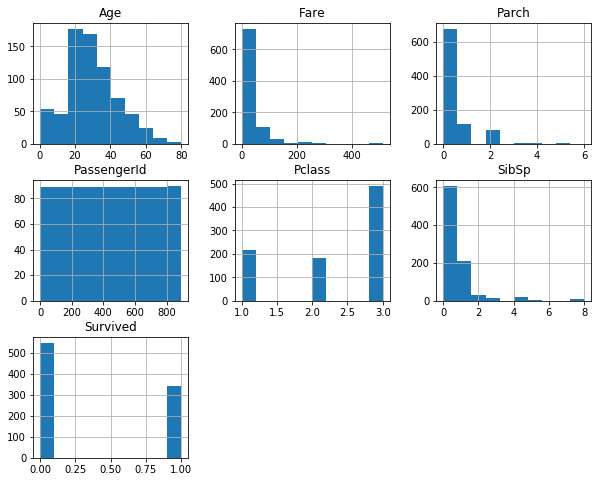

In [10]:
# Plotting histograms of numerical variables in the train DF
train_df.hist(figsize=(10, 8));

Looking at the histograms, the numerical variables don't seem to follow any particular statistical distribution. Except for the **PassengerID** that presents an uniform distribution, since there is one different ID for each passenger. 

On the other hand, to see the impact of individual categorical or numerical variables over the surviving chances we can use **pandas groupby** method to calculate some desired probabilities.

In [11]:
# Survival Probabilities crossed with variables Sex, Pclass and Embarked
print(f'{" By Sex ":-^30}')
print()
display(train_df[['Sex', 'Survived']].groupby(['Sex']).mean())
print('\n')
print(f'{" By Socio-economic Classs ":-^50}')
print()
display(train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
print('\n')
print(f'{" By Port of Embarkation ":-^50}')
print()
display(train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean())

----------- By Sex -----------



,Survived
Sex,
female,0.742038
male,0.188908




------------ By Socio-economic Classs ------------



,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363




------------- By Port of Embarkation -------------



,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


As mentioned earlier, historical facts suggested that women, children and first class passengers had a greater "luck" in surviving, and this is also confirmed by the calculated probabilities above.

The same results can also be seen with a visual aid using **seaborn library**.



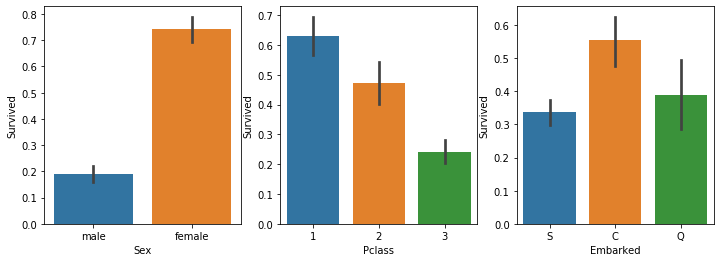

In [12]:
# Barplots of Survived vs. Sex, Pclass e Embarked variables
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train_df, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axis3);

Some important variables can have a wide range of values, which is the case of **Age** (continous numerical variable). In that case, a different technique is suited for a better data visualization.

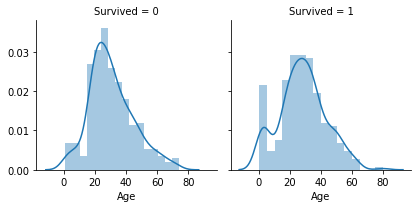

In [13]:
# Survival chances based on the Age data distribution
age_survived = sns.FacetGrid(train_df, col='Survived')
age_survived.map(sns.distplot, 'Age');

In percentage terms, it is not clear that the **Age** is a critical atribute to the survival chances since children was spected to be more likely to survive and they are in minority in the ship. However it's still noticeable the number of children that survived is greater than the number that didn't survive.

Up to this point, only individual analysis on each variable was made. Yet, cheking for correlations between variables is equally important.



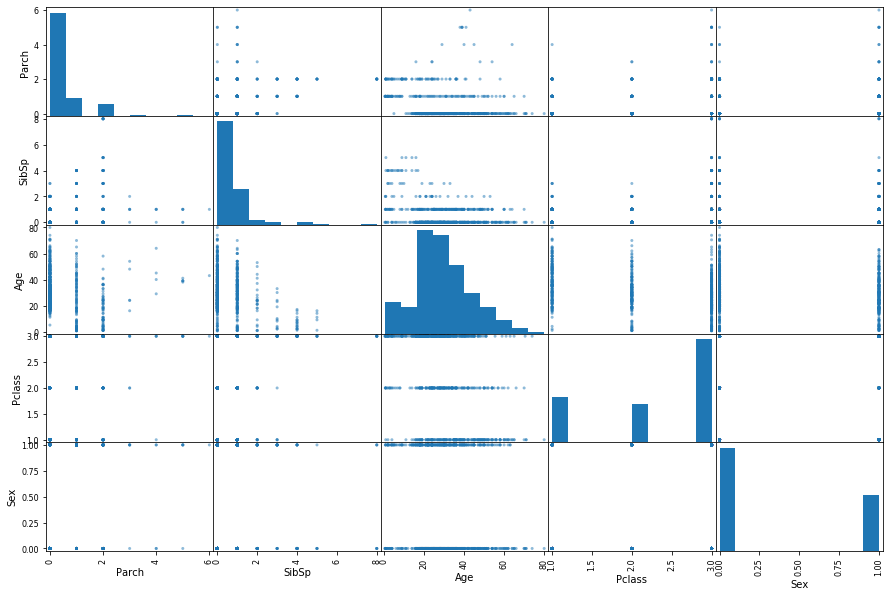

In [0]:
# Mapping the Sex categorical variable into a numerical variable
# male = 0 / female = 1
train_df['Sex'] = train_df['Sex'].map({'male' : 0, 'female' : 1})

# Plotting a scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass', 'Sex']
pd.plotting.scatter_matrix(train_df[columns], figsize=(15, 10));

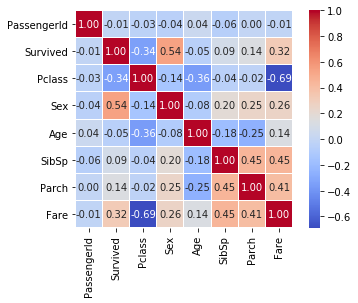

In [0]:
# Plotting a heatmap for numerical variables
sns.heatmap(train_df.corr(method='spearman'), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

With these two illustrative approaches it's possible to recognize relations between crossed variables and to rise some quentions on whether or not these correlation values make sense, helping on the decision of which variables are important to consider in the machine learning model. 

# 4. Pre-processing the Data

So far all we have done was import the dataset into DataFrames, explained the variables, raised some hypothesis about the surviving chances and did some data exploration on the variables that we judge to be more relevant.

A data science project is not narrowed to a step-by-step solution, instead, it is a interactive work where we need to take a step back many times, searching for new valuable information, testing hypothesis and trying different analysis,mainly during the data exploration phase.

At this stage of the project the objective is to process the data accordingly to its needs before we can feed it into a ML model. With the help of **pandas library** this can be done fairly quickly. 

# Merging the train and test datasets

A good habit when you get to the data pre-processing stage is to merge the train and test datasets into one, so that is only necessary to apply the pre-processing techniques once and then you can separate the datasets into train and test again at the end.

Filling missing values, creating dummy variables, encoding and scaling (standardization) variables are some of the main techniques used in this phase. 

Let's start preparing the data to feed our ML model in the next step.





In [14]:
# Saving the train and test dataset index before merging for futher separation
train_idx = train_df.shape[0]
test_idx = test_df.shape[0]

# Saving PassengerID of test dataset for Kaggle challenge submission
passengerId = test_df['PassengerId']

# Separating the target variable from the train dataset
target = train_df.Survived.copy()
train_df.drop(['Survived'], axis=1, inplace=True)

# Merging the train and test into one DataFrame
merged_df = pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True)

print("merged_df.shape: ({} rows x {} columns)".format(merged_df.shape[0], merged_df.shape[1]))

merged_df.shape: (1309 rows x 11 columns)


# Selecting the Desired Features

Taking all the data analysis done so far,it's time to weight which variables are valuable to our machine learning model. Variables that we judge not to be important should be droped from our DataFrame.

It is worth mentioning that sometimes we can make incorrect decisions. But is up to the Data Scientist to try different ideas and choose which features best fit the ML model.

**['PassengerID', 'Name', 'Ticket', 'Cabin']** are variables that don't **seem** to have any influence in the surviving chances. So they will be droped from our DataFrame taking the data exploration and some intuition into account.

This leave the DF with 7 variables: **['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']**.


In [0]:
# Droping undesired features from the DataFrame
merged_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Dealing with the Missing Values

We have already seen the percentage of missing values in an earlier section. However, we need to check again for the merged DF, since we only checked for the **train** dataset before.

There are two better known techniques to handle missing values, they are:

* Filling these values arbitrarily (with the mean, median, most frequent value (mode)); and
* Cutting out the entire row that has a missing value.

This decision is also for the Data Scientist to take. But normally, it's is not a good practice to throw away information of an entire row because of one missing value. So, here we choose to use the first technique.



In [16]:
# Checking each variable for missing values
merged_df.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

For the **Age**, **Fare** and **Embarked**  we're going to fill the missing values with the **mean**, **median** and **mode**, 
respectively. 

In [0]:
# Age
age_median = merged_df['Age'].median()
merged_df['Age'].fillna(age_median, inplace=True)

# Fare
fare_median = merged_df['Fare'].mean()
merged_df['Fare'].fillna(fare_median, inplace=True)

# Embarked
embarked_top = merged_df['Embarked'].value_counts()[0]
merged_df['Embarked'].fillna(embarked_top, inplace=True)

# Preparing the Variables to Feed the ML Model

Depending on the machine learning model that is going to be applied, it is mandatory to convert categorical into numerical variables. This is the case for the models we're going to use.

On this DataFrame only the **'Sex'** and **'Embarked'** variables are categorical, so we are going to map the two sexes into **male = 0** and **female = 1**. And for the ports of embarkation we're going to use the concept of dummy variables.

Dummy variables can only assume binary values (0 or 1), creating a new column for each possible value of the categorical variable as can be seen in the code lines below.

In [18]:
# Mapping 'Sex' into 0 = male and 1 = female
merged_df['Sex'] = merged_df['Sex'].map({'male': 0, 'female': 1})

# Converting 'Embarked' into Dummy Variables
embarked_dummies = pd.get_dummies(merged_df['Embarked'], prefix='Embarked')
merged_df = pd.concat([merged_df, embarked_dummies], axis=1)
merged_df.drop('Embarked', axis=1, inplace=True)

display(merged_df.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


# Recovering the train and test datasets

After preparing the datasets to feed the model, lets separate the train and test data as they were before.

In [0]:
# recuperar datasets de treino e teste
train_df = merged_df.iloc[:train_idx]
test_df = merged_df.iloc[train_idx:]

# 5. Machine Learning Model Creation

Without a doubt, exploration and pre-processing of the data are the most time consuming steps of a DS project.

All those steps were significant to proceed to the ML model creation, which can be done with a few lines of code using **scikit-learn** library. 

We're going to test tree ML models to test which one gives the best accuracy to this problem, they are:

* Logistic Regression Model
* Decision Tree Model
* Naive Bayes Classifier

In [0]:
# Importing scikit-learn library with the ML models to be used
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  

In [23]:
# Creating a Logistic Regression Model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train_df, target)

# Verifying the model accuracy
lr_acc = round(lr_model.score(train_df, target) * 100, 2)
print(f'Logistic Regression Model Accuracy: {lr_acc} %')

Logistic Regression Model Accuracy: 80.13 %


With 2 lines of code we were able to build a Logistic Regression model with an accuracy greater then 80%, which is an excellent result for a first model.

Now, let's prepare a .csv file for submission on Kaggle platform.

In [0]:
# Predicting the test dataset outcome with the trained model
lr_predic = lr_model.predict(test_df)

submission = pd.DataFrame({
    'PassengerID': passengerId,
    'Survived': lr_predic
    })

# Generating .csv file for Kaggle submission
submission.to_csv('./submission_lr.csv', index=False)

After submission, Kaggle computes a score based on the results of your submitted file. This model was able to reach a 74.64% score.

![](https://github.com/msremigio/projects_DataScience/blob/master/images/kaggle_lr_score.PNG?raw=true)

It is completely acceptable to obtain a lower accuracy with the prediction based on the test dataset, once our model was trained using only the train dataset (the train dataset will fit better to the model).

Now, we will do the same steps for the Decision Tree model.


In [26]:
# Creating a Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(train_df, target)

# verificar a acurácia do modelo
dt_acc = round(dt_model.score(train_df, target) * 100, 2)
print(f'Decision Tree Model Accuracy: {dt_acc} %')

Decision Tree Model Accuracy: 82.72 %


Testing the Decision Tree model, there was a 2.59% gain in accuracy, let's submit this improvement to Kaggle again.

In [0]:
dt_predic = dt_model.predict(test_df)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": dt_predic
})

submission.to_csv('./submission_dt.csv', index=False)

This model was able to reach a 77.99% score.

![](https://github.com/msremigio/projects_DataScience/blob/master/images/kaggle_dt_score.PNG?raw=true)

Finally, let's check what are the results using a Naive Bayes classifier.

In [28]:
# Creating a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(train_df, target)

# verificar a acurácia do modelo
nb_acc = round(nb_model.score(train_df, target) * 100, 2)
print(f'Naive Bayes Classifier Accuracy: {nb_acc} %')

Naive Bayes Classifier Accuracy: 68.46 %


It is obvious that the Naive Bayes classifier didn't achieve a good result as the past two models. 

In [0]:
nb_predic = nb_model.predict(test_df)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": nb_predic
})

submission.to_csv('./submission_nb.csv', index=False)

This model was able to reach a 69.86% score.

![](https://github.com/msremigio/projects_DataScience/blob/master/images/kaggle_nb_score.PNG?raw=true)

# Would I be a survivor?

Now that we know that the Decision Tree model was the one that gave the best accuracy, let's see if I would survive to the Titanic incident.

Assuming that I would travel in the 2nd class, with 24 years old, with my parents , brother and girlfriend, paying a medium price ticket and embarking in Southampton (UK).  

In [34]:
# Declaring the variables values according to the description above
matheus = np.array([2, 0, 24.0, 2, 2, 32.2, 0, 0, 0, 1]).reshape((1, -1))

# Verifying if I would have survived
print(f'Matheus Remigio:\t{dt_model.predict(matheus)[0]}')

Matheus Remigio:	0


Unfortunately, according to our own model I would not had survived to the Titanic tragedy. Result that corroborates with the initial hypothesis that women, chieldren and 1st class passengers had a greater chance of surviving.

---

Naturally, it is possible to accomplish better results applying more advanced ML models, feature engineering and some other pre-processing techniques. However, as a first project, this dataset proportionates the opportunity to learn and apply some of the central concepts within the Data Science field and helps to delevop skills that will be used towards any future project.

Beyond that, I hope that everything is well explained so that you can replicate everything by you own if you want to ;).